
Classification Metrics:
+-----------+---------+
| Metric    |   Value |
+===========+=========+
| Accuracy  |  0.9165 |
+-----------+---------+
| Precision |  0.9169 |
+-----------+---------+
| Recall    |  0.9165 |
+-----------+---------+
| F1-Score  |  0.9159 |
+-----------+---------+


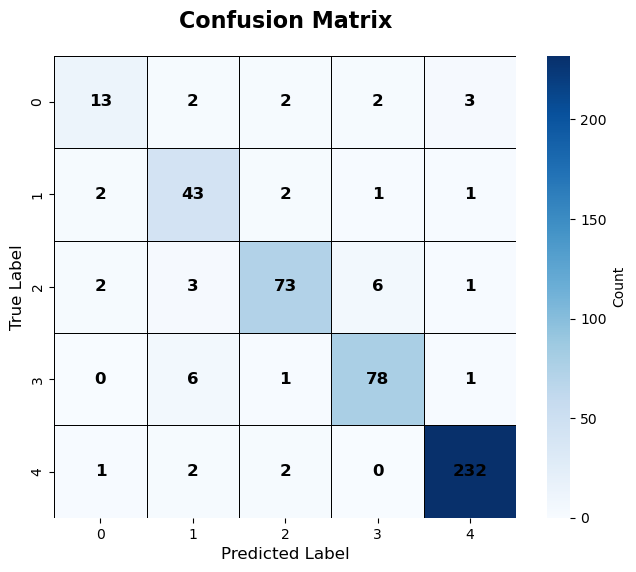

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import scipy.stats as stats
import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(y_true, y_pred, y_pred_proba=None):

    # Calculate metrics
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_true, y_pred, average='weighted', zero_division=0),
        'F1-Score': f1_score(y_true, y_pred, average='weighted', zero_division=0)
    }
    
    if y_pred_proba is not None:
        try:
            metrics['ROC-AUC'] = roc_auc_score(y_true, y_pred_proba, multi_class='ovr')
        except ValueError as e:
            print(f"ROC-AUC calculation failed: {e}")
    
    # Prepare metrics for table
    metrics_table = [[metric, f"{value:.4f}"] for metric, value in metrics.items()]
    
    # Print metrics in a table
    print("\nClassification Metrics:")
    print(tabulate(metrics_table, headers=['Metric', 'Value'], tablefmt='grid', floatfmt='.4f'))
    
    cm = np.array([
        [13,  2,  2,  2,  3],
        [ 2, 43,  2,  1,  1],
        [ 2,  3, 73,  6,  1],
        [ 0,  6,  1, 78,  1],
        [ 1,  2,  2,  0, 232]
    ])
    
    # Plotting of the confusion matrix with a style
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',  
                cbar_kws={'label': 'Count'},
                annot_kws={'size': 12, 'weight': 'bold', 'color': 'black'},
                linewidths=0.5, linecolor='black',
                square=True)
    
    # Customised labels and title
    plt.title('Confusion Matrix', fontsize=16, pad=20, weight='bold')
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    # Display of the plot
    plt.show()
    
    return metrics, cm

# y_true and y_pred is being reconstructed for the confusion matrix to compute the metrics
y_true = []
y_pred = []
cm = np.array([
    [13,  2,  2,  2,  3],
    [ 2, 43,  2,  1,  1],
    [ 2,  3, 73,  6,  1],
    [ 0,  6,  1, 78,  1],
    [ 1,  2,  2,  0, 232]
])
for true_label in range(5):
    for pred_label in range(5):
        count = cm[true_label, pred_label]
        y_true.extend([true_label] * count)
        y_pred.extend([pred_label] * count)

# No y_pred_proba is available
y_pred_proba = None

# Call the function
metrics, cm = evaluate_model(y_true, y_pred, y_pred_proba)